<a href="https://colab.research.google.com/github/fjoaovictor/Titanic_MachineLearning/blob/main/p2_ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Segundo projeto aprendendo machine learning

Meu objetivo é criar um arquivo para prever quantas pessoas sobreviveram no Titanic com Machine Learning.



In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [14]:
train = pd.read_csv('train.csv')
test= pd.read_csv('test.csv')

In [15]:
# Tratamento dos dados
train.drop(['Name'], axis=1, inplace=True)
test.drop(['Name'], axis=1, inplace=True)

train['Sex'] = train['Sex'].map(lambda x: 1 if x == 'male' else 0)
test['Sex'] = test['Sex'].map(lambda x: 1 if x == 'male' else 0)

In [ ]:
# Tratar colunas vazias
train['Age'] = train['Age'].fillna(-1)
test['Age'] = test['Age'].fillna(-1)

In [ ]:
train.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.647587,23.600640,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,0.477990,17.867496,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.000000,-1.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,6.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,1.000000,24.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200


In [16]:

train.isnull().sum().sort_values(ascending=False)


Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

Verificando os valores nulos nas colunas.

Considerando a grande quantidade de dados nulos na coluna 'Cabin', iremos excluir do modelo.

In [17]:
train.drop(['Cabin'], axis=1, inplace=True)
test.drop(['Cabin'], axis=1, inplace=True)

<Axes: xlabel='Survived', ylabel='count'>

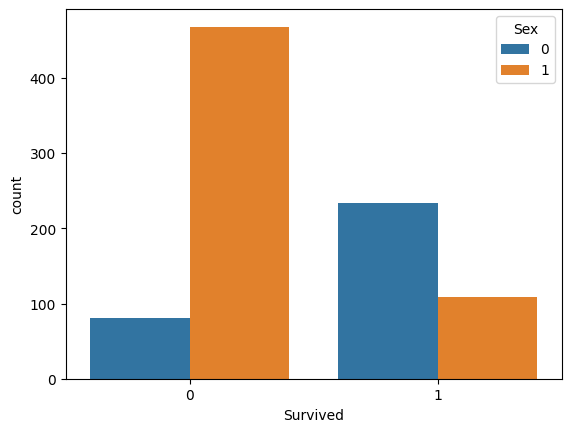

In [28]:
sns.countplot(x='Survived', data=train, hue='Sex')

array([<Axes: title={'center': '0'}>, <Axes: title={'center': '1'}>],
      dtype=object)

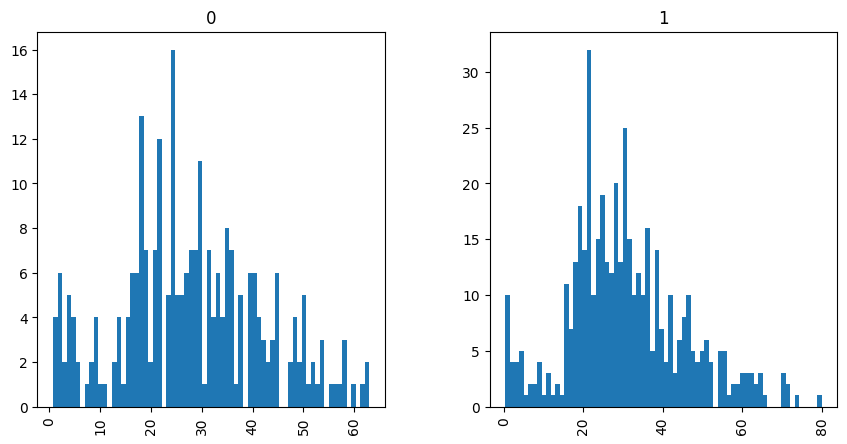

In [37]:
train.hist(column='Age', by='Sex', figsize=(10,5), bins=70)

In [39]:
#Eliminando colunas tipo strings
train.drop(['Ticket'], axis=1, inplace=True)
test.drop(['Ticket'], axis=1, inplace=True)
train.drop(['Embarked'], axis=1, inplace=True)
test.drop(['Embarked'], axis=1, inplace=True)

In [40]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,3,1,22.0,1,0,7.2500
1,2,1,1,0,38.0,1,0,71.2833
2,3,1,3,0,26.0,0,0,7.9250
3,4,1,1,0,35.0,1,0,53.1000
4,5,0,3,1,35.0,0,0,8.0500


In [45]:
x_train = train.drop(['Survived'], axis=1)
y_train = train['Survived']

In [51]:
x_test = test

In [44]:
from sklearn.ensemble import ExtraTreesClassifier

In [49]:
x_train = x_train.fillna(-1)
x_test = x_test.fillna(-1)

In [59]:
x_test = x_test.fillna(-1)

In [60]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    int64  
 3   Age          418 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Fare         418 non-null    float64
dtypes: float64(2), int64(5)
memory usage: 23.0 KB


In [63]:
modelo = ExtraTreesClassifier()
modelo.fit(x_train, y_train)

pred = modelo.predict(x_test)

In [64]:
test['Survived'] = pred

In [80]:
final_test = test[['PassengerId', 'Survived']]

In [81]:
final_test.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [82]:
final_test.to_csv('submission.csv', index=False)